[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5658 - loss: 0.6855 - val_accuracy: 0.8125 - val_loss: 0.6054
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9177 - loss: 0.4941 - val_accuracy: 0.8375 - val_loss: 0.3639
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9790 - loss: 0.1351 - val_accuracy: 0.8687 - val_loss: 0.3392
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9971 - loss: 0.0362 - val_accuracy: 0.8687 - val_loss: 0.3674
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0142 - val_accuracy: 0.8687 - val_loss: 0.3921
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

=== Evaluation Metrics ===
Accuracy: 0.825
Precision: 0.841025641025641
Recall: 0.8078817733990148
F1 Score: 0.8241206030150754

Confusion Matrix:
 [[166  31]
 [ 39 164]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       197
           1       0.84      0.81  

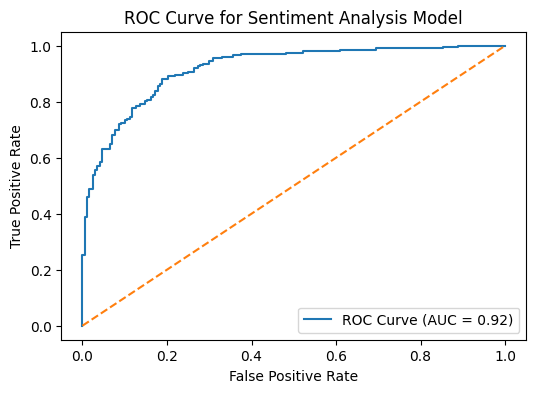

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Sample Review: This movie was absolutely wonderful! The story and acting were great.
Predicted Sentiment: Positive


In [2]:
# Install dependencies
!pip install nltk tensorflow scikit-learn matplotlib --quiet

import nltk
from nltk.corpus import movie_reviews
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Download dataset
nltk.download('movie_reviews')

# Load and shuffle data
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

# Prepare data
texts = [" ".join(words) for words, label in documents]
labels = [label for words, label in documents]

# Encode labels (0 = neg, 1 = pos)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

# Build Keras Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_vec, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

# Predictions
y_pred_prob = model.predict(X_test_vec)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\n=== Evaluation Metrics ===")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)
print("ROC-AUC Score:", roc_auc)

# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Sentiment Analysis Model")
plt.legend()
plt.show()

# Test custom input
sample = ["This movie was absolutely wonderful! The story and acting were great."]
sample_vec = vectorizer.transform(sample).toarray()
prediction = model.predict(sample_vec)
sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"

print("\nSample Review:", sample[0])
print("Predicted Sentiment:", sentiment)